In [4]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples = 100, n_features = 2, 
                                   n_redundant = 0, n_classes = 2,
                                   random_state = 7816)

In [6]:
X.shape, y.shape

((100, 2), (100,))

#### 데이터셋 시각화

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.set_cmap('jet')
%matplotlib inline

Text(0,0.5,'y values')

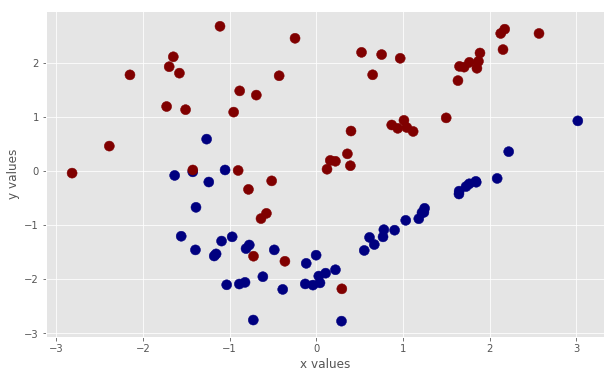

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel('x values')
plt.ylabel('y values')

#### OpenCV 용 데이터 준비
- 필요조건
    - X의 모든 기능 값은 32비트 부동소수점 숫자여야 함.
    - 타겟 레이블은 -1 또는 +1이어야 한다.

In [14]:
import numpy as np
X = X.astype(np.float32)
y = y * 2 -1

In [18]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

#### Make SVM 

In [23]:
import cv2
svm = cv2.ml.SVM_create()

In [25]:
svm.setKernel(cv2.ml.SVM_LINEAR)

In [27]:
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [28]:
_, y_pred = svm.predict(X_test)

In [30]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8

#### 의사 결정 경계 시각화

In [37]:
def plot_decision_boundary(svm, X_test, y_test):
    x_min, x_max = X_test[:,0].min() -1, X_test[:,0].max() + 1
    y_min, y_max = X_test[:,1].min() -1, X_test[:,1].max() + 1
    
    h = 0.02 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    X_hypo = np.c_[xx.ravel().astype(np.float32), 
                    yy.ravel().astype(np.float32)]
    
    _, zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx,yy,zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:,0], X_test[:,1], c = y_test, s = 200)

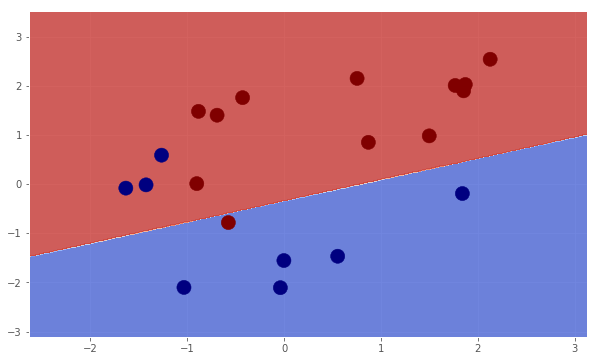

In [38]:
plt.figure(figsize=(10,6))
plot_decision_boundary(svm, X_test, y_test)